## Step 1. Objectives of the Analysis

The objective of this analysis is to explore and visualize the meteorite landings data provided by NASA. The analysis aims to:

1. Understand the distribution and characteristics of meteorite landings.
2. Identify patterns or trends in the data.
3. Create interactive visualizations to present the findings in an engaging and informative way.


## Step 2. Install Required Modules and Import Necessary Libraries

In [1]:
# # Install packages
# !pip install pandas_geojson
# !pip install geopandas
# !pip install pymongo
# !pip install plotly
# !pip install shapely

In [2]:
# Step 2. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import requests
from shapely.geometry import mapping
import pandas_geojson as pdg
import geopandas as gpd
from pandas import json_normalize
from pymongo import MongoClient
from pprint import pprint
import warnings

warnings.filterwarnings('ignore')

## Step 3. Extract Data and Convert Data into a DataFrame

In [3]:
# Step 3. Load the dataset from NASA URL
url = 'https://data.nasa.gov/resource/gh4g-9sfh.json?$limit=50000'
response = requests.get(url)
data = response.json()

# Convert the data into a pandas DataFrame
# df = pd.DataFrame(data)
df = json_normalize(data)

## 4. Exploratory Data Analysis (EDA) and Data Cleaning

In [4]:
# 4.1 Initial exploration

# Display the first few rows of the dataframe
print("----------'Print the Head'-----------------")
display(df.head())

----------'Print the Head'-----------------


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.latitude,geolocation.longitude,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,50.775,6.08333,NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,56.18333,10.23333,NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,54.21667,-113.0,NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,16.88333,-99.9,NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,-33.16667,-64.95,NaN,NaN


In [5]:
# Display basic information about the dataframe
print("----------'Print DataFrame Information'-----------------")
display(df.info())

----------'Print DataFrame Information'-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         45716 non-null  object
 1   id                           45716 non-null  object
 2   nametype                     45716 non-null  object
 3   recclass                     45716 non-null  object
 4   mass                         45585 non-null  object
 5   fall                         45716 non-null  object
 6   year                         45425 non-null  object
 7   reclat                       38401 non-null  object
 8   reclong                      38401 non-null  object
 9   geolocation.latitude         38401 non-null  object
 10  geolocation.longitude        38401 non-null  object
 11  :@computed_region_cbhk_fwbd  1659 non-null   object
 12  :@computed_region_nnqa_25f4  16

None

In [6]:
# Display basic statistics of the dataframe
print("----------'Print the basic stats'-----------------")
display(df.describe().T)

----------'Print the basic stats'-----------------


,count,unique,top,freq
name,45716,45716,Aachen,1
id,45716,45716,1,1
nametype,45716,2,Valid,45641
recclass,45716,466,L6,8285
mass,45585,12576,1.3,171
fall,45716,2,Found,44609
year,45425,266,2003-01-01T00:00:00.000,3323
reclat,38401,12738,0.000000,6438
reclong,38401,14640,0.000000,6214
geolocation.latitude,38401,12738,0.0,6438


In [7]:
# 4.2 Convert necessary columns to appropriate data types

df['mass'] = pd.to_numeric(df['mass'], errors='coerce')
df['year'] = df['year'].str.split('-', expand = True)[0]
df['reclat'] = pd.to_numeric(df['reclat'], errors='coerce')
df['reclong'] = pd.to_numeric(df['reclong'], errors='coerce')

In [8]:
# Display first five rows
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.latitude,geolocation.longitude,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,50.775,6.08333,NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,56.18333,10.23333,NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,54.21667,-113.0,NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,16.88333,-99.9,NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,-33.16667,-64.95,NaN,NaN


In [9]:
# list columns

list(df.columns)

['name',
 'id',
 'nametype',
 'recclass',
 'mass',
 'fall',
 'year',
 'reclat',
 'reclong',
 'geolocation.latitude',
 'geolocation.longitude',
 ':@computed_region_cbhk_fwbd',
 ':@computed_region_nnqa_25f4']

In [10]:
# Drop rows with missing values in critical columns (Delete all NaN values (mass and year and reclat/reclon)
df_cleaned = df.dropna(subset=['name', 'id', 'mass', 'year', 'reclat', 'reclong'], inplace = True)


In [11]:
# Drop columns with @ symbol
df_cleaned = df.drop(columns = ['id', ':@computed_region_cbhk_fwbd', ':@computed_region_nnqa_25f4', 
                               'geolocation.latitude', 'geolocation.longitude'], axis = 1) 

In [12]:
# Convert 'year' column to integers
df_cleaned['year'] = df_cleaned['year'].astype(int)

In [13]:
# Create a new column 'GeoLocation' derived from 'reclat' and 'reclong' columns
df_cleaned['GeoLocation'] = df_cleaned.apply(lambda row: (row['reclat'], row['reclong']), axis=1)


In [14]:
# Display the cleaned dataframe
display(df_cleaned.head())
display(df_cleaned.info())

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"


<class 'pandas.core.frame.DataFrame'>
Index: 38115 entries, 0 to 45715
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   nametype     38115 non-null  object 
 2   recclass     38115 non-null  object 
 3   mass         38115 non-null  float64
 4   fall         38115 non-null  object 
 5   year         38115 non-null  int64  
 6   reclat       38115 non-null  float64
 7   reclong      38115 non-null  float64
 8   GeoLocation  38115 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.9+ MB


None

In [15]:
# Check for null values
df_cleaned.isnull().sum()


name           0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [16]:
# Delete all data points with 0 lat and 0 long
cleaned_df = df_cleaned[(df_cleaned['reclat'] != 0) & (df_cleaned['reclong'] != 0)]

cleaned_df[['reclat','reclong']].describe().T

,count,mean,std,min,25%,50%,75%,max
reclat,31705.0,-47.602009,46.714171,-87.36667,-79.68333,-72.00000,18.39317,81.16667
reclong,31705.0,73.452607,83.419083,-165.43333,26.00000,57.14703,159.41482,178.20000


In [17]:
# Check for outlier years
print('--------------- Years after date --------------------------')
print([year for year in cleaned_df['year'].unique() if year > 2010])
print('--------------- Years Sorted Desc --------------------------')
print(cleaned_df['year'].sort_values(ascending=False))

--------------- Years after date --------------------------
[2012, 2011, 2013]
--------------- Years Sorted Desc --------------------------
194      2013
22890    2012
17260    2012
31062    2012
3425     2012
         ... 
5365     1576
283      1492
856      1491
278      1400
704       861
Name: year, Length: 31705, dtype: int64


In [18]:
# Meteorite reclassifications

cleaned_df.recclass.replace(to_replace=['Acapulcoite', 'Acapulcoite/Lodranite', 'Acapulcoite/lodranite',
           'Lodranite','Lodranite-an','Winonaite','Achondrite-prim'],value='PA',inplace=True)

cleaned_df.recclass.replace(to_replace=['Angrite', 'Aubrite','Aubrite-an','Ureilite', 'Ureilite-an','Ureilite-pmict',
           'Brachinite','Diogenite', 'Diogenite-an', 'Diogenite-olivine', 'Diogenite-pm',
           'Eucrite', 'Eucrite-Mg rich', 'Eucrite-an', 'Eucrite-br','Eucrite-cm',
           'Eucrite-mmict', 'Eucrite-pmict', 'Eucrite-unbr','Howardite'],value='AA',inplace=True)

cleaned_df.recclass.replace(to_replace=['Lunar', 'Lunar (anorth)', 'Lunar (bas. breccia)',
           'Lunar (bas/anor)', 'Lunar (bas/gab brec)', 'Lunar (basalt)',
           'Lunar (feldsp. breccia)', 'Lunar (gabbro)', 'Lunar (norite)'],value='Lu',inplace=True)

cleaned_df.recclass.replace(to_replace=['Martian', 'Martian (OPX)','Martian (chassignite)', 'Martian (nakhlite)',
           'Martian (shergottite)','Martian (basaltic breccia)'],value='Ma',inplace=True)

cleaned_df.recclass.replace(to_replace=['C','C2','C4','C4/5','C6','C1-ung', 'C1/2-ung','C2-ung',
           'C3-ung', 'C3/4-ung','C4-ung','C5/6-ung',
           'CB', 'CBa', 'CBb', 'CH/CBb', 'CH3', 'CH3 ', 'CI1', 'CK', 'CK3',
           'CK3-an', 'CK3.8', 'CK3/4', 'CK4', 'CK4-an', 'CK4/5', 'CK5',
           'CK5/6', 'CK6', 'CM', 'CM-an', 'CM1', 'CM1/2', 'CM2', 'CM2-an',
           'CO3', 'CO3 ', 'CO3.0', 'CO3.1', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5',
           'CO3.6', 'CO3.7', 'CO3.8', 'CR', 'CR-an', 'CR1', 'CR2', 'CR2-an',
           'CV2', 'CV3', 'CV3-an','CR7'],value='CC',inplace=True)

cleaned_df.recclass.replace(to_replace=['OC', 'OC3','H', 'H(5?)', 'H(?)4', 'H(L)3', 'H(L)3-an', 'H-an','H-imp melt',
           'H-melt rock', 'H-metal', 'H/L3', 'H/L3-4', 'H/L3.5',
           'H/L3.6', 'H/L3.7', 'H/L3.9', 'H/L4', 'H/L4-5', 'H/L4/5', 'H/L5',
           'H/L6', 'H/L6-melt rock', 'H/L~4', 'H3', 'H3 ', 'H3-4', 'H3-5',
           'H3-6', 'H3-an', 'H3.0', 'H3.0-3.4', 'H3.1', 'H3.10', 'H3.2',
           'H3.2-3.7', 'H3.2-6', 'H3.2-an', 'H3.3', 'H3.4', 'H3.4-5',
           'H3.4/3.5', 'H3.5', 'H3.5-4', 'H3.6', 'H3.6-6', 'H3.7', 'H3.7-5',
           'H3.7-6', 'H3.7/3.8', 'H3.8', 'H3.8-4', 'H3.8-5', 'H3.8-6',
           'H3.8-an', 'H3.8/3.9', 'H3.8/4', 'H3.9', 'H3.9-5', 'H3.9-6',
           'H3.9/4', 'H3/4', 'H4', 'H4 ', 'H4(?)', 'H4-5', 'H4-6', 'H4-an',
           'H4/5', 'H4/6', 'H5', 'H5 ', 'H5-6', 'H5-7', 'H5-an',
           'H5-melt breccia', 'H5/6', 'H6', 'H6 ', 'H6-melt breccia', 'H6/7',
           'H7', 'H?','H~4', 'H~4/5', 'H~5', 'H~6','L', 'L(?)3',
           'L(H)3', 'L(LL)3', 'L(LL)3.05', 'L(LL)3.5-3.7', 'L(LL)5', 'L(LL)6',
           'L(LL)~4', 'L-imp melt', 'L-melt breccia', 'L-melt rock', 'L-metal',
           'L/LL', 'L/LL(?)3', 'L/LL-melt rock', 'L/LL3', 'L/LL3-5', 'L/LL3-6',
           'L/LL3.10', 'L/LL3.2', 'L/LL3.4', 'L/LL3.5', 'L/LL3.6/3.7', 'L/LL4',
           'L/LL4-6', 'L/LL4/5', 'L/LL5', 'L/LL5-6', 'L/LL5/6', 'L/LL6',
           'L/LL6-an', 'L/LL~4', 'L/LL~5', 'L/LL~6', 'L3', 'L3-4', 'L3-5',
           'L3-6', 'L3-7', 'L3.0', 'L3.0-3.7', 'L3.0-3.9', 'L3.05', 'L3.1',
           'L3.10', 'L3.2', 'L3.2-3.5', 'L3.2-3.6', 'L3.3', 'L3.3-3.5',
           'L3.3-3.6', 'L3.3-3.7', 'L3.4', 'L3.4-3.7', 'L3.5', 'L3.5-3.7',
           'L3.5-3.8', 'L3.5-3.9', 'L3.5-5', 'L3.6', 'L3.6-4', 'L3.7',
           'L3.7-3.9', 'L3.7-4', 'L3.7-6', 'L3.7/3.8', 'L3.8', 'L3.8-5',
           'L3.8-6', 'L3.8-an', 'L3.9', 'L3.9-5', 'L3.9-6', 'L3.9/4', 'L3/4',
           'L4', 'L4 ', 'L4-5', 'L4-6', 'L4-an', 'L4-melt rock', 'L4/5', 'L5',
           'L5 ', 'L5-6', 'L5-7', 'L5/6', 'L6', 'L6 ', 'L6-melt breccia',
           'L6-melt rock', 'L6/7', 'L7', 'LL', 'LL(L)3', 'LL-melt rock', 'LL3',
           'LL3-4', 'LL3-5', 'LL3-6', 'LL3.0', 'LL3.00', 'LL3.1', 'LL3.1-3.5',
           'LL3.10', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.5', 'LL3.6',
           'LL3.7', 'LL3.7-6', 'LL3.8', 'LL3.8-6', 'LL3.9', 'LL3.9/4', 'LL3/4',
           'LL4', 'LL4-5', 'LL4-6', 'LL4/5', 'LL4/6', 'LL5', 'LL5-6', 'LL5-7',
           'LL5/6', 'LL6', 'LL6 ', 'LL6(?)', 'LL6/7', 'LL7', 'LL7(?)',
           'LL<3.5', 'LL~3', 'LL~4', 'LL~4/5', 'LL~5', 'LL~6',
           'L~3', 'L~4', 'L~5', 'L~6','Relict H','Relict OC','LL-melt breccia','H-melt breccia',
                                 'L5-melt breccia','LL-imp melt','H3.05','LL6-melt breccia',
                                 'LL3.05','H4-melt breccia','LL3.8-4','L3.00','L~4-6','LL6-an',
                                 'L4-melt breccia','LL(L)3.1','L3-melt breccia','H3.15'],value='OC',inplace=True)

cleaned_df.recclass.replace(to_replace=['EH','EH-imp melt', 'EH3', 'EH3/4-an', 'EH4', 'EH4/5', 'EH5', 'EH6',
           'EH6-an', 'EH7', 'EH7-an', 'EL3', 'EL3/4', 'EL4', 'EL4/5', 'EL5',
           'EL6', 'EL6 ', 'EL6/7', 'EL7','E','E3','E4', 'E5','E6','EL-melt rock'],value='EC',inplace=True)

cleaned_df.recclass.replace(to_replace=['K', 'K3','R', 'R3', 'R3-4', 'R3-5', 'R3-6', 'R3.4', 'R3.5-6',
           'R3.6', 'R3.7', 'R3.8', 'R3.8-5', 'R3.8-6', 'R3.9', 'R3/4', 'R4',
           'R4/5', 'R5', 'R6','R3.5-4'],value='AOC',inplace=True)

cleaned_df.recclass.replace(to_replace=['Pallasite', 'Pallasite, PES','Pallasite, PMG',
           'Pallasite, PMG-an', 'Pallasite, ungrouped',
           'Pallasite?'],value='P',inplace=True)

cleaned_df.recclass.replace(to_replace=['Mesosiderite', 'Mesosiderite-A','Mesosiderite-A1',
           'Mesosiderite-A2', 'Mesosiderite-A3','Mesosiderite-A3/4',
           'Mesosiderite-A4', 'Mesosiderite-B','Mesosiderite-B1',
           'Mesosiderite-B2', 'Mesosiderite-B4','Mesosiderite-C',
           'Mesosiderite-C2', 'Mesosiderite-an','Mesosiderite?'],value='MG',inplace=True)

cleaned_df.recclass.replace(to_replace=['Iron, IC', 'Iron, IC-an', 'Iron, IIAB', 'Iron, IIAB-an',
           'Iron, IIC', 'Iron, IID', 'Iron, IID-an','Iron, IIF', 'Iron, IIG',
           'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IIIAB?', 'Iron, IIIE',
           'Iron, IIIE-an', 'Iron, IIIF', 'Iron, IVA', 'Iron, IVA-an',
           'Iron, IVB'],value='MIM',inplace=True)

cleaned_df.recclass.replace(to_replace=['Iron, IAB complex', 'Iron, IAB-MG','Iron, IAB-an', 'Iron, IAB-sHH',
           'Iron, IAB-sHL', 'Iron, IAB-sLH','Iron, IAB-sLL', 'Iron, IAB-sLM',
           'Iron, IAB-ung', 'Iron, IAB?','Iron, IIE',
           'Iron, IIE-an', 'Iron, IIE?'],value='NMIM',inplace=True)

cleaned_df.recclass.replace(to_replace=['Iron','Iron?','Relict iron','Chondrite-fusion crust',
           'Fusion crust','Impact melt breccia',
           'Enst achon-ung','Iron, ungrouped','Stone-uncl', 'Stone-ung',
           'Unknown','Achondrite-ung','Chondrite-ung',
           'Enst achon','E-an',  'E3-an',  'E5-an','Howardite-an','C3.0-ung','Iron, IAB-sHL-an'],value='UN',inplace=True)

In [19]:
# Summary of reclassification counts
cleaned_df['recclass'].value_counts()

recclass
OC      28247
AA        828
CC        825
MIM       532
EC        385
UN        235
NMIM      228
MG        121
Lu        100
P          64
PA         58
Ma         44
AOC        38
Name: count, dtype: int64

In [20]:
# check the first five rows()
cleaned_df.head()


,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,Valid,OC,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,Valid,OC,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,Valid,EC,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,Valid,PA,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,Valid,OC,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [21]:
# Create column class_name with a reclassification of the reclass column

meteorite_class_dict = {
    'CC': 'Carbonaceous Chondrite',
    'OC': 'Ordinary Chondrite',
    'Ma': 'Martian',
    'AA': 'Asteroidal Achondrites',
    'PA': 'Primitive Achondrites',
    'Lu': 'Lunar',
    'EC': 'Enstatite Chondrite',
    'AOC': 'Other Chondrite Groups',
    'P': 'Pallasites',
    'MG': 'Mesosiderite Group',
    'MIM': 'Magmatic Iron Meteorite Groups',
    'NMIM': 'Non-magmatic or Primitive Iron Meteorite Groups',
    'UN': 'Not Enough Information (Ungrouped or Unknown)'
}
meteorite_class_dict

{'CC': 'Carbonaceous Chondrite',
 'OC': 'Ordinary Chondrite',
 'Ma': 'Martian',
 'AA': 'Asteroidal Achondrites',
 'PA': 'Primitive Achondrites',
 'Lu': 'Lunar',
 'EC': 'Enstatite Chondrite',
 'AOC': 'Other Chondrite Groups',
 'P': 'Pallasites',
 'MG': 'Mesosiderite Group',
 'MIM': 'Magmatic Iron Meteorite Groups',
 'NMIM': 'Non-magmatic or Primitive Iron Meteorite Groups',
 'UN': 'Not Enough Information (Ungrouped or Unknown)'}

In [22]:
# Add class name
cleaned_df['class_name'] = cleaned_df['recclass'].map(meteorite_class_dict)
cleaned_df.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,class_name
0,Aachen,Valid,OC,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",Ordinary Chondrite
1,Aarhus,Valid,OC,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",Ordinary Chondrite
2,Abee,Valid,EC,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",Enstatite Chondrite
3,Acapulco,Valid,PA,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",Primitive Achondrites
4,Achiras,Valid,OC,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",Ordinary Chondrite


In [23]:
# Group name mapping

meteorite_group_dict = {
    'Stony Meteorite': ['CC','OC','EC','AOC','Ma','AA','PA','Lu'],
    'Stony-iron meteorite': ['P','MG'],
    'Iron meteorite': ['MIM','NMIM'],
    'Ungrouped or Unknown': ['UN']
}

mapping_dict = {}
for category, items in meteorite_group_dict.items():
    for item in items:
        mapping_dict[item] = category
mapping_dict

{'CC': 'Stony Meteorite',
 'OC': 'Stony Meteorite',
 'EC': 'Stony Meteorite',
 'AOC': 'Stony Meteorite',
 'Ma': 'Stony Meteorite',
 'AA': 'Stony Meteorite',
 'PA': 'Stony Meteorite',
 'Lu': 'Stony Meteorite',
 'P': 'Stony-iron meteorite',
 'MG': 'Stony-iron meteorite',
 'MIM': 'Iron meteorite',
 'NMIM': 'Iron meteorite',
 'UN': 'Ungrouped or Unknown'}

In [24]:
# Adding/Mapping group_name to the DataFrame

cleaned_df['group_name'] = cleaned_df['recclass'].map(mapping_dict)
cleaned_df.head()


,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,class_name,group_name
0,Aachen,Valid,OC,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",Ordinary Chondrite,Stony Meteorite
1,Aarhus,Valid,OC,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",Ordinary Chondrite,Stony Meteorite
2,Abee,Valid,EC,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",Enstatite Chondrite,Stony Meteorite
3,Acapulco,Valid,PA,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",Primitive Achondrites,Stony Meteorite
4,Achiras,Valid,OC,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",Ordinary Chondrite,Stony Meteorite


In [25]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31705 entries, 0 to 45715
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         31705 non-null  object 
 1   nametype     31705 non-null  object 
 2   recclass     31705 non-null  object 
 3   mass         31705 non-null  float64
 4   fall         31705 non-null  object 
 5   year         31705 non-null  int64  
 6   reclat       31705 non-null  float64
 7   reclong      31705 non-null  float64
 8   GeoLocation  31705 non-null  object 
 9   class_name   31705 non-null  object 
 10  group_name   31705 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.9+ MB


In [26]:
# Confirm if there are rows with zero lat & lon in the DF

cleaned_df.loc[(cleaned_df['reclat'] == 0) & (cleaned_df['reclong'] == 0)]

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,class_name,group_name


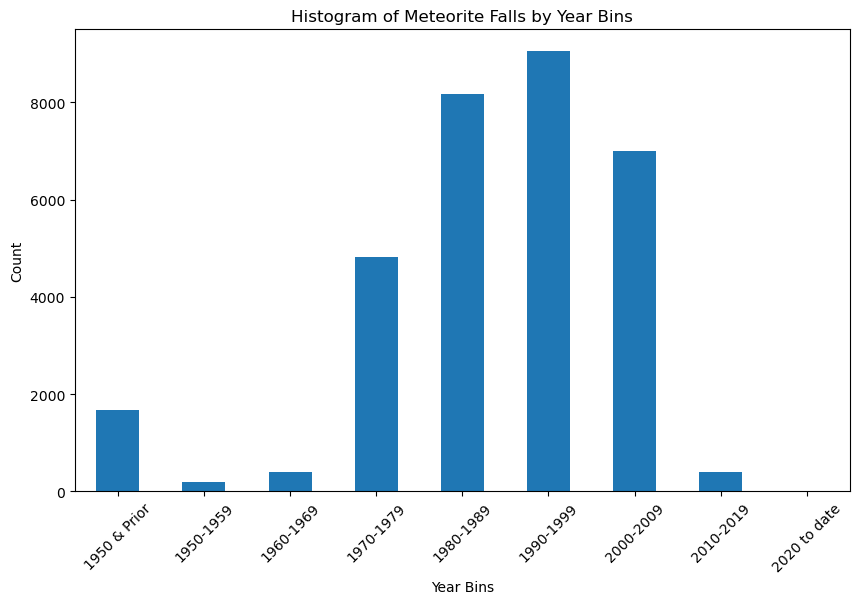

In [27]:
# 4.3 Create year bins / buckets
# Define the bins for categorizing the years, extending the range to cover all possible years
bins = [float('-inf'), 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, float('inf')]
labels = [f"{int(bins[i])}-{int(bins[i+1]-1)}" if bins[i] != float('-inf') and bins[i+1] != float('inf') else 
          (f"{int(bins[i+1])} & Prior" if bins[i] == float('-inf') else f"{int(bins[i])} to date")
          for i in range(len(bins)-1)]

# Categorize years into bins
cleaned_df['year_bin'] = pd.cut(cleaned_df['year'], bins=bins, labels=labels)

# Plot the histogram
plt.figure(figsize=(10, 6))
cleaned_df['year_bin'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Year Bins')
plt.ylabel('Count')
plt.title('Histogram of Meteorite Falls by Year Bins')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Categorize years into bins
cleaned_df['year_bin'] = pd.cut(cleaned_df['year'], bins=bins, labels=labels)
cleaned_df.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,class_name,group_name,year_bin
0,Aachen,Valid,OC,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",Ordinary Chondrite,Stony Meteorite,1950 & Prior
1,Aarhus,Valid,OC,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",Ordinary Chondrite,Stony Meteorite,1950-1959
2,Abee,Valid,EC,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",Enstatite Chondrite,Stony Meteorite,1950-1959
3,Acapulco,Valid,PA,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",Primitive Achondrites,Stony Meteorite,1970-1979
4,Achiras,Valid,OC,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",Ordinary Chondrite,Stony Meteorite,1950 & Prior


In [29]:
# Confirm data types one more time

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31705 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         31705 non-null  object  
 1   nametype     31705 non-null  object  
 2   recclass     31705 non-null  object  
 3   mass         31705 non-null  float64 
 4   fall         31705 non-null  object  
 5   year         31705 non-null  int64   
 6   reclat       31705 non-null  float64 
 7   reclong      31705 non-null  float64 
 8   GeoLocation  31705 non-null  object  
 9   class_name   31705 non-null  object  
 10  group_name   31705 non-null  object  
 11  year_bin     31705 non-null  category
dtypes: category(1), float64(3), int64(1), object(7)
memory usage: 2.9+ MB


In [30]:
# Create a new column for the logarithm of the mass 
## (using the natural logarithm (base e))

# Add a small constant to avoid log(0) issues if there are any zero or negative mass values
epsilon = 1e-10
cleaned_df['mass'] = cleaned_df['mass'].fillna(0)  # Fill NaN values with 0 for illustration

# Apply the logarithmic transformation
cleaned_df['log_mass'] = np.log(cleaned_df['mass'] + epsilon)

# Display the first few rows to check the new column
cleaned_df.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,class_name,group_name,year_bin,log_mass
0,Aachen,Valid,OC,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",Ordinary Chondrite,Stony Meteorite,1950 & Prior,3.044522
1,Aarhus,Valid,OC,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",Ordinary Chondrite,Stony Meteorite,1950-1959,6.579251
2,Abee,Valid,EC,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",Enstatite Chondrite,Stony Meteorite,1950-1959,11.580584
3,Acapulco,Valid,PA,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",Primitive Achondrites,Stony Meteorite,1970-1979,7.556951
4,Achiras,Valid,OC,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",Ordinary Chondrite,Stony Meteorite,1950 & Prior,6.659294


In [31]:
# Add new Columns named deaths and casualties
cleaned_df['deaths'] = 0
cleaned_df['casualties'] = 0


In [32]:
# Add new Columns meteorite_width (cms) (assuming spherical object based on densities of half iron and half stone)
def calc_diameter(mass_g):
    pi = math.pi
        # Calculate the radius
        # (3 * (mass_g/1000) / (4 * pi * average density kg.m^3))^(1/3)
    r = (3 * (mass_g/1000) / (4 * pi * 3908))**(1/3)
    return r*2*100

cleaned_df['meteorite_width_cm'] = calc_diameter(cleaned_df['mass'])

In [33]:
# Display the first few rows to check the new column
cleaned_df.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,class_name,group_name,year_bin,log_mass,deaths,casualties,meteorite_width_cm
0,Aachen,Valid,OC,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",Ordinary Chondrite,Stony Meteorite,1950 & Prior,3.044522,0,0,2.173145
1,Aarhus,Valid,OC,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",Ordinary Chondrite,Stony Meteorite,1950-1959,6.579251,0,0,7.059812
2,Abee,Valid,EC,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",Enstatite Chondrite,Stony Meteorite,1950-1959,11.580584,0,0,37.394713
3,Acapulco,Valid,PA,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",Primitive Achondrites,Stony Meteorite,1970-1979,7.556951,0,0,9.779791
4,Achiras,Valid,OC,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",Ordinary Chondrite,Stony Meteorite,1950 & Prior,6.659294,0,0,7.250709


In [34]:
# Convert cleaned_df DataFrame itno GeoDataFrame
geodf = gpd.GeoDataFrame(cleaned_df, geometry=gpd.points_from_xy(cleaned_df['reclong'], cleaned_df['reclat']))
geodf.shape

(31705, 17)

In [35]:
# Print the top 5 rows of geodf
geodf.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,class_name,group_name,year_bin,log_mass,deaths,casualties,meteorite_width_cm,geometry
0,Aachen,Valid,OC,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",Ordinary Chondrite,Stony Meteorite,1950 & Prior,3.044522,0,0,2.173145,POINT (6.08333 50.77500)
1,Aarhus,Valid,OC,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",Ordinary Chondrite,Stony Meteorite,1950-1959,6.579251,0,0,7.059812,POINT (10.23333 56.18333)
2,Abee,Valid,EC,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",Enstatite Chondrite,Stony Meteorite,1950-1959,11.580584,0,0,37.394713,POINT (-113.00000 54.21667)
3,Acapulco,Valid,PA,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",Primitive Achondrites,Stony Meteorite,1970-1979,7.556951,0,0,9.779791,POINT (-99.90000 16.88333)
4,Achiras,Valid,OC,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",Ordinary Chondrite,Stony Meteorite,1950 & Prior,6.659294,0,0,7.250709,POINT (-64.95000 -33.16667)


In [36]:
# View geodf information
geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 31705 entries, 0 to 45715
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                31705 non-null  object  
 1   nametype            31705 non-null  object  
 2   recclass            31705 non-null  object  
 3   mass                31705 non-null  float64 
 4   fall                31705 non-null  object  
 5   year                31705 non-null  int64   
 6   reclat              31705 non-null  float64 
 7   reclong             31705 non-null  float64 
 8   GeoLocation         31705 non-null  object  
 9   class_name          31705 non-null  object  
 10  group_name          31705 non-null  object  
 11  year_bin            31705 non-null  category
 12  log_mass            31705 non-null  float64 
 13  deaths              31705 non-null  int64   
 14  casualties          31705 non-null  int64   
 15  meteorite_width_cm  31705 non-nul

## 5. Insert Data into DataBase

In [37]:
# Create an instance of MongoClient and connect to MongoDB
mongo = MongoClient(port=27017)
db = mongo.meteorite_landings  
collection = db.meteorite_geo 

In [38]:
# Convert geometry column to GeoJson-lie format
geometries = [mapping(geometry) for geometry in geodf.geometry]

In [39]:
# Create a new DataFrame without the geometry column
data = geodf.drop('geometry', axis=1)

In [40]:
# Convert DataFrame to Dictionary Format
data_dict = data.to_dict('records')

In [41]:
# Add the geometry data to each record
for idx, geometry in enumerate(geometries):
    data_dict[idx]['geometry'] = geometry

In [42]:
# Remove all existing documents in te collection
collection.delete_many({})

DeleteResult({'n': 31708, 'ok': 1.0}, acknowledged=True)

In [43]:
# Insert data into MongoDB
collection.insert_many(data_dict)

InsertManyResult([ObjectId('667609341d99a6e47b3c8473'), ObjectId('667609341d99a6e47b3c8474'), ObjectId('667609341d99a6e47b3c8475'), ObjectId('667609341d99a6e47b3c8476'), ObjectId('667609341d99a6e47b3c8477'), ObjectId('667609341d99a6e47b3c8478'), ObjectId('667609341d99a6e47b3c8479'), ObjectId('667609341d99a6e47b3c847a'), ObjectId('667609341d99a6e47b3c847b'), ObjectId('667609341d99a6e47b3c847c'), ObjectId('667609341d99a6e47b3c847d'), ObjectId('667609341d99a6e47b3c847e'), ObjectId('667609341d99a6e47b3c847f'), ObjectId('667609341d99a6e47b3c8480'), ObjectId('667609341d99a6e47b3c8481'), ObjectId('667609341d99a6e47b3c8482'), ObjectId('667609341d99a6e47b3c8483'), ObjectId('667609341d99a6e47b3c8484'), ObjectId('667609341d99a6e47b3c8485'), ObjectId('667609341d99a6e47b3c8486'), ObjectId('667609341d99a6e47b3c8487'), ObjectId('667609341d99a6e47b3c8488'), ObjectId('667609341d99a6e47b3c8489'), ObjectId('667609341d99a6e47b3c848a'), ObjectId('667609341d99a6e47b3c848b'), ObjectId('667609341d99a6e47b3c84

In [44]:
# Confirm that our new database was created
print(mongo.list_database_names())

['admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_db', 'local', 'met', 'meteorite_landings', 'petsitly_marketing', 'travel_db', 'uk_food']


In [45]:
# Assign the database to a variable name
db = mongo['meteorite_landings']

In [46]:
# Review the collections in our new database
print(db.list_collection_names())

['meteorite_geo']


In [47]:
# Review a document in the meteorite_geo collection
pprint(db.meteorite_geo.find_one())

{'GeoLocation': [50.775, 6.08333],
 '_id': ObjectId('667609341d99a6e47b3c8473'),
 'casualties': 0,
 'class_name': 'Ordinary Chondrite',
 'deaths': 0,
 'fall': 'Fell',
 'geometry': {'coordinates': [6.08333, 50.775], 'type': 'Point'},
 'group_name': 'Stony Meteorite',
 'log_mass': 3.044522437728185,
 'mass': 21.0,
 'meteorite_width_cm': 2.173145004128975,
 'name': 'Aachen',
 'nametype': 'Valid',
 'recclass': 'OC',
 'reclat': 50.775,
 'reclong': 6.08333,
 'year': 1880,
 'year_bin': '1950 & Prior'}


In [48]:
# Count documents in the collection
db.meteorite_geo.count_documents({})

31705

In [49]:
# Remove the Record with name:  'Chicxulub'
db.meteorite_geo.delete_one(
    {'name': 'Chicxulub'}
)

DeleteResult({'n': 0, 'ok': 1.0}, acknowledged=True)

In [50]:
# Add a new record for name:'Chicxulub'
db.meteorite_geo.insert_one(
{
    'GeoLocation': [21.400000, -89.516667],
    'casualties': 'Millions',
    'class_name': 'Carbonaceous chondrite',
    'deaths': 'Only 75% of all life on earth',
    'fall': 'Found',
    'geometry': {'type': 'Point', 'coordinates': [-89.516667, 21.400000]},
    'group_name': 'Stony Meteorite',
    'log_mass': 46.888949384414616,
    'mass': 2310000000000000000,
    'name': 'Chicxulub',
    'nametype': 'Valid',
    'recclass': 'CC',
    'reclat': 21.40,
    'reclong': -89.516667,
    'year': -66043000,
    'year_bin': '65 million years ago',
    'meteorite_width_cm': 1000000
}
);

In [51]:
# Find result by name
query = {'name': 'Chicxulub'}
results = db.meteorite_geo.find(query)
for result in results:
    print(result)

{'_id': ObjectId('667609351d99a6e47b3d004c'), 'GeoLocation': [21.4, -89.516667], 'casualties': 'Millions', 'class_name': 'Carbonaceous chondrite', 'deaths': 'Only 75% of all life on earth', 'fall': 'Found', 'geometry': {'type': 'Point', 'coordinates': [-89.516667, 21.4]}, 'group_name': 'Stony Meteorite', 'log_mass': 46.888949384414616, 'mass': 2310000000000000000, 'name': 'Chicxulub', 'nametype': 'Valid', 'recclass': 'CC', 'reclat': 21.4, 'reclong': -89.516667, 'year': -66043000, 'year_bin': '65 million years ago', 'meteorite_width_cm': 1000000}


In [52]:
# Remove the Record with name:  'Chicxulub'
db.meteorite_geo.delete_one(
    {'name': 'Ottoman1888'}
)

DeleteResult({'n': 0, 'ok': 1.0}, acknowledged=True)

In [53]:
# Add a new record for name:'Ottoman1888'
db.meteorite_geo.insert_one(
    {'GeoLocation': [35.570630448170306, 45.39138498577206],
 'casualties': '2',
 'class_name': 'Unknown',
 'deaths': '1',
 'fall': 'Fell',
 'geometry': { 'type': 'Point', 'coordinates': [45.39138498577206, 35.570630448170306]},
 'group_name': 'Unknown',
 'log_mass': -23.025850929940457,
 'mass': 0,
 'name': 'Ottoman1888',
 'nametype': 'Valid',
 'recclass': 'UN',
 'reclat': 35.570630448170306,
 'reclong': 45.39138498577206,
 'year': 1888,
 'year_bin': '1950 & Prior',
 'meteorite_width_cm': 'Unknown'}
)
   

InsertOneResult(ObjectId('667609351d99a6e47b3d004d'), acknowledged=True)

In [54]:
query = {'name':'Ottoman1888'}
results = db.meteorite_geo.find(query)
for result in results:
    print(result)

{'_id': ObjectId('667609351d99a6e47b3d004d'), 'GeoLocation': [35.570630448170306, 45.39138498577206], 'casualties': '2', 'class_name': 'Unknown', 'deaths': '1', 'fall': 'Fell', 'geometry': {'type': 'Point', 'coordinates': [45.39138498577206, 35.570630448170306]}, 'group_name': 'Unknown', 'log_mass': -23.025850929940457, 'mass': 0, 'name': 'Ottoman1888', 'nametype': 'Valid', 'recclass': 'UN', 'reclat': 35.570630448170306, 'reclong': 45.39138498577206, 'year': 1888, 'year_bin': '1950 & Prior', 'meteorite_width_cm': 'Unknown'}


In [55]:
# Remove the Record with name:  'Chicxulub'
db.meteorite_geo.delete_one(
    {'name': 'Qingyang1490'}
)

DeleteResult({'n': 0, 'ok': 1.0}, acknowledged=True)

In [56]:
# Add a new record for name:'Qingyang1490'
db.meteorite_geo.insert_one(
    {'GeoLocation': [35.740456892064685, 107.65399647142137],
 'casualties': '10000',
 'class_name': 'Unknown',
 'deaths': '10000',
 'fall': 'Fell',
 'geometry': { 'type': 'Point', 'coordinates': [107.65399647142137, 35.740456892064685]},
 'group_name': 'Unknown',
 'log_mass': 7.215813343736801,
 'mass': 1360.77,
 'name': 'Qingyang1490',
 'nametype': 'Valid',
 'recclass': 'UN',
 'reclat': 35.740456892064685,
 'reclong': 107.65399647142137,
 'year': 1490,
 'year_bin': '1950 & Prior',
 'meteorite_width_cm': 5}
)


InsertOneResult(ObjectId('667609351d99a6e47b3d004e'), acknowledged=True)

In [57]:
query = {'name':'Qingyang1490'}
results = db.meteorite_geo.find(query)
for result in results:
    print(result)

{'_id': ObjectId('667609351d99a6e47b3d004e'), 'GeoLocation': [35.740456892064685, 107.65399647142137], 'casualties': '10000', 'class_name': 'Unknown', 'deaths': '10000', 'fall': 'Fell', 'geometry': {'type': 'Point', 'coordinates': [107.65399647142137, 35.740456892064685]}, 'group_name': 'Unknown', 'log_mass': 7.215813343736801, 'mass': 1360.77, 'name': 'Qingyang1490', 'nametype': 'Valid', 'recclass': 'UN', 'reclat': 35.740456892064685, 'reclong': 107.65399647142137, 'year': 1490, 'year_bin': '1950 & Prior', 'meteorite_width_cm': 5}
